# **Logistic Regression**

**Problem Statement**

One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.

**Data Dictionary**

| Variable | Description                                                |
|----------|------------------------------------------------------------|
| DATE     | The date of the observation                                 |
| PRCP     | The amount of precipitation, in inches                       |
| MAX      | The maximum temperature for that day, in degrees Fahrenheit |
| TMIN     | The minimum temperature for that day, in degrees Fahrenheit |
| RAIN     | TRUE if rain was observed on that day, FALSE if it was not  |


## **Data Collection**

**Import libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

**Load dataset**

In [37]:
data = pd.read_csv('seattleWeather_1948-2017.csv')

In [38]:
data.head(3)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True


In [39]:
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

**Finding and treating NULL values**

In [40]:
data.isna().sum(axis=0)

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

**1.RAIN**

In [41]:
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


finding the chances of rain

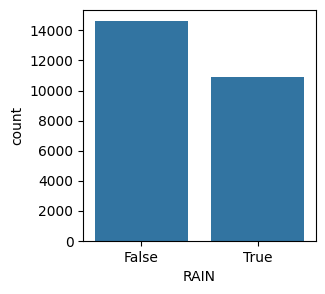

In [42]:
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed
sns.countplot(data=data, x='RAIN')
plt.show()

In [43]:
# custom function to determine the chances of 'RAIN'
def rain_insertion(cols):
  RAIN=cols[0]
  if pd.isnull(RAIN):
    return 'False'
  else:
    return RAIN

In [44]:
# Applying funcion
data['RAIN'] = data[['RAIN']].apply(rain_insertion, axis=1)

**2.PRCP**

In [45]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,False
18416,1998-06-03,NaN,66,51,False
21067,2005-09-05,NaN,70,52,False


In [46]:
# function to insert mean instead of NULL
def prcp_insertion(cols):
  PRCP = cols[0]
  if pd.isnull(PRCP):
    return data['PRCP'].mean()
  else:
    return PRCP

In [47]:
# applying function
data['PRCP'] = data[['PRCP']].apply(prcp_insertion, axis=1)

## **Exploratory Data Analysis**

**Correlation between percipitation and minimum temparature**

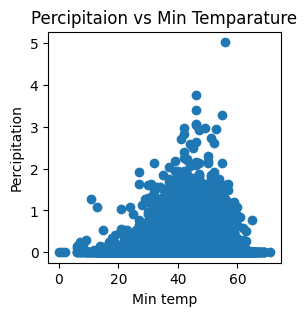

In [48]:
plt.figure(figsize=(3,3))
plt.scatter(x='TMIN', y='PRCP', data=data)
plt.xlabel('Min temp')
plt.ylabel('Percipitation')
plt.title('Percipitaion vs Min Temparature')
plt.show()

**Pair plot**

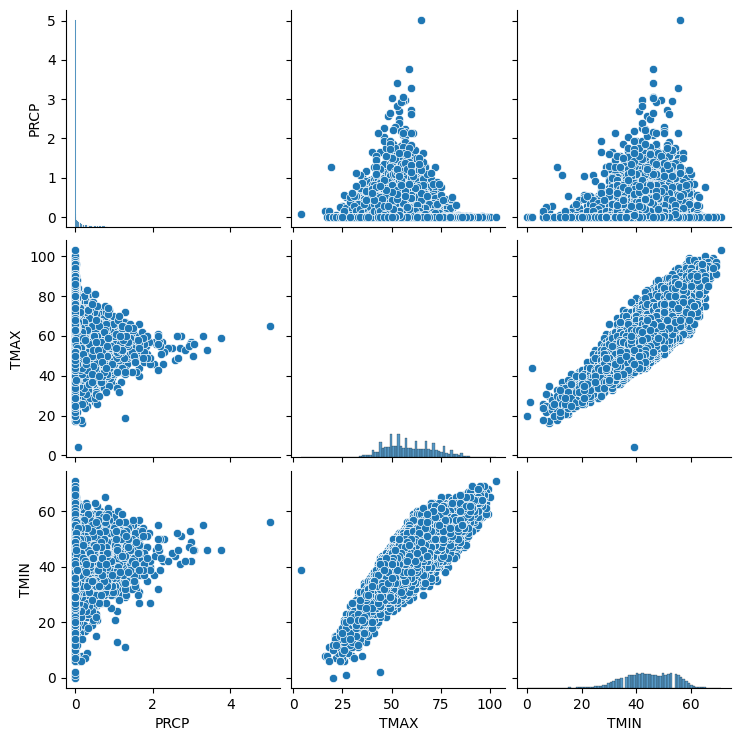

In [49]:
sns.pairplot(data=data)

**Distribution of Minimum temparature**

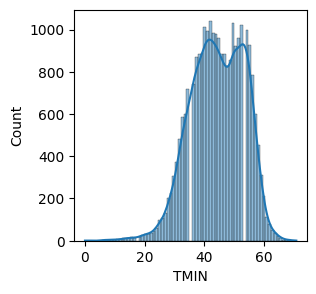

In [54]:
plt.figure(figsize=(3,3))
sns.histplot(data['TMIN'], kde=True)
plt.show()

**Distribution of Maximum Temparature**

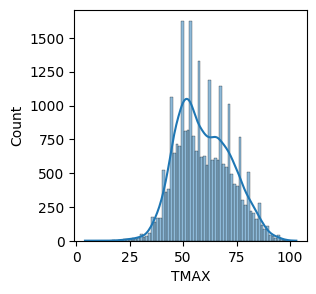

In [55]:
plt.figure(figsize=(3,3))
sns.histplot(data['TMAX'], kde=True)
plt.show()

**Boxplot**

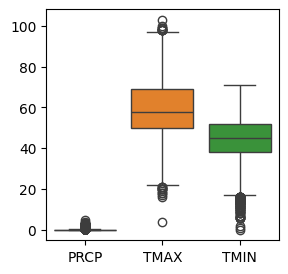

In [59]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data)
plt.show()

**Outlier treatment**

In [60]:
data = data.drop(data[(data['PRCP']>0.25) | (data['PRCP']<-0.15)].index)

In [61]:
data = data.drop(data[(data['TMAX']>97.5) | (data['TMAX']<21.5)].index)

In [62]:
data = data.drop(data[data['TMIN']<17].index)

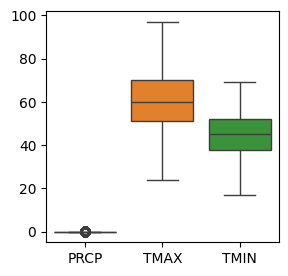

In [63]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data)
plt.show()

## **Logistic Regression**

**importing logistic regression model**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
lr = LogisticRegression()

In [68]:
X = data.drop(['RAIN', 'DATE'], axis=1)
y = data['RAIN']
y = y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
lr.fit(X_train, y_train).score(X_train, y_train)

0.9146492659053833

Accuracy of model is 91.4%

In [70]:
# fitting model in test set
prediction = lr.predict(X_test)